In [43]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [44]:
X = np.genfromtxt("lung_cancer_data.csv", delimiter=",")
y = np.genfromtxt("lung_cancer_label.csv")

# Part 1 and Part 2

In [45]:
X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(400, 5)
(50, 5)
(50, 5)


In [46]:
# function for gradient descent
def gradient_descent(X, y, learning_rate=0.1, iters=1000):
    m, n = X.shape
    w = np.zeros(n)
    errors = []

    for _ in range(iters):
        y_pred = X.dot(w)

        errors.append(mean_squared_error(y, y_pred))

        gradient = X.T.dot(y_pred - y) / m
        w -= learning_rate * gradient

    plt.plot([i for i in range(iters)], errors)
    plt.xlabel("iteration")
    plt.ylabel("error")
    plt.show()

    return w, errors



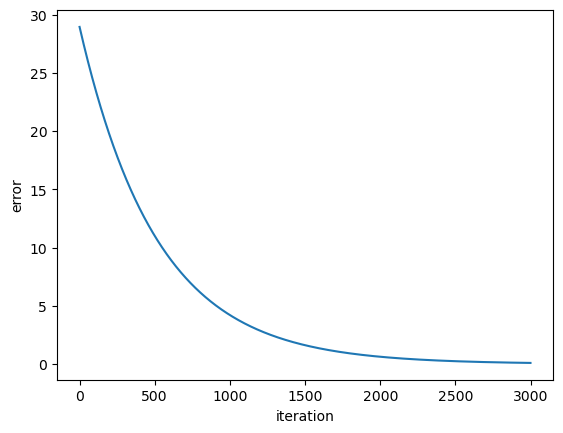

weights: [2.81399336 0.95760409 0.01675746 1.93789843 3.76076873 0.01664757]


In [47]:
X_train_linear = np.hstack((X_train, np.ones((X_train.shape[0], 1)))) 

w_linear, errors = gradient_descent(X_train_linear, y_train, learning_rate=0.001, iters=3000)

print(f'weights: {w_linear}')

In [48]:
# printing mse for training, testing and validation
X_test_linear = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
X_val_linear = np.hstack((X_val, np.ones((X_val.shape[0], 1))))

print(f'training mse: {mean_squared_error(y_train, X_train_linear.dot(w_linear))}')
print(f'testing mse: {mean_squared_error(y_test, X_test_linear.dot(w_linear))}')
print(f'validation mse: {mean_squared_error(y_val, X_val_linear.dot(w_linear))}')

training mse: 0.09658928050387149
testing mse: 0.11972915515449976
validation mse: 0.12359079454768514


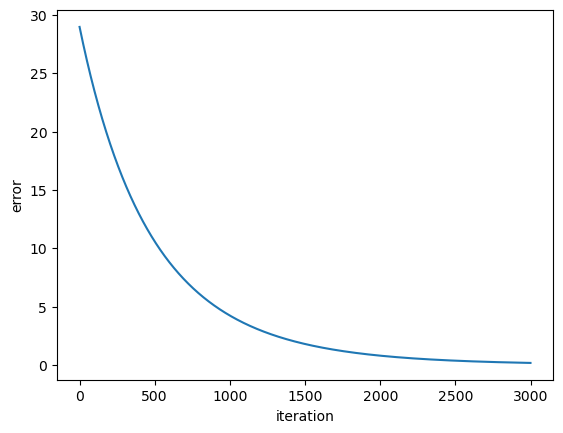

weights: [-3.12335510e-02  2.76994099e+00  9.19249122e-01 -2.69300715e-02
  1.85215005e+00  3.70775090e+00  3.40323926e-03 -9.61837121e-02
 -6.15047124e-02  2.34585403e-02 -3.42151525e-02 -4.48092428e-02
 -5.66161291e-02 -2.21872271e-02 -4.11941455e-02 -2.57370234e-02
  8.46012524e-02  3.69649835e-02  1.25646105e-01  1.32502246e-01
 -3.69393723e-02]


In [49]:
# for polynomial
poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_val_poly = poly.fit_transform(X_val)

w_poly, errors = gradient_descent(X_train_poly, y_train, learning_rate=0.001, iters=3000)

print(f'weights: {w_poly}')

In [50]:
# printing mse for training, testing and validation
print(f'training mse: {mean_squared_error(y_train, X_train_poly.dot(w_poly))}')
print(f'testing mse: {mean_squared_error(y_test, X_test_poly.dot(w_poly))}')
print(f'validation mse: {mean_squared_error(y_val, X_val_poly.dot(w_poly))}')

training mse: 0.17258975970148208
testing mse: 0.4485644097218705
validation mse: 0.3130859707250114


# Which model would I pick?
Based on the results, I would pick the linear regression model, as the MSEs are lower compared to the quadratic model.

# Getting the first 20 samples

In [52]:
X_20 = X_train_linear[:20, :]
y_20 = y_train[:20]

table = [[X_20[i].dot(w_linear), y_20[i]] for i in range(20)]
print(tabulate(table, headers=["Predicted", "Actual"]))

  Predicted    Actual
-----------  --------
  -1.49775      -1.55
  -5.64044      -6
 -12.2842      -13.01
   1.17057       1.13
  -1.52885      -1.62
  -0.353925     -0.54
  -2.92785      -3.14
  -4.34085      -4.6
   3.86141       4.01
  -3.61316      -3.72
   8.27089       8.76
   5.48751       5.87
  -4.41826      -4.67
 -13.4966      -14.32
   3.24241       3.49
  -0.199431     -0.18
  -0.255546     -0.41
  -0.257182     -0.23
  10.4375       11.03
   3.6083        3.72
